## Prepping data for ML

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier


In [2]:
saber = pd.read_csv('saber.csv', float_precision = 'round_trip', index_col = 0)
saber

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,Playoff
0,2000,Anaheim Angels,5.33,4322,953,5.9,117,0.303,0.280,0.279,...,0.800,105,0.529,39.4,3.3,0.805,0.308,0.193,133.4,0
1,2000,Arizona Diamondbacks,4.89,4338,829,5.1,120,0.290,0.265,0.278,...,0.810,88,0.481,-116.0,-10.8,0.726,0.270,0.164,125.8,0
2,2000,Atlanta Braves,5.00,4314,856,5.3,116,0.302,0.271,0.273,...,0.797,95,0.498,-45.1,-4.3,0.754,0.282,0.157,162.0,1
3,2000,Baltimore Orioles,4.90,4335,832,5.1,111,0.293,0.272,0.270,...,0.777,100,0.466,5.2,0.3,0.740,0.275,0.163,149.6,0
4,2000,Boston Red Sox,4.89,4360,852,5.2,118,0.297,0.267,0.280,...,0.803,90,0.474,-88.3,-8.2,0.721,0.267,0.156,68.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021,St. Louis Cardinals,4.36,4253,735,4.5,97,0.287,0.244,0.242,...,0.727,99,0.499,-3.7,-0.6,0.685,0.270,0.168,122.8,1
656,2021,Tampa Bay Rays,5.29,4335,792,4.8,93,0.294,0.243,0.239,...,0.713,110,0.528,85.9,8.3,0.725,0.301,0.186,126.0,1
657,2021,Texas Rangers,3.86,4340,613,3.7,98,0.280,0.232,0.246,...,0.732,83,0.411,-131.9,-13.2,0.611,0.238,0.143,129.7,0
658,2021,Toronto Blue Jays,5.22,4198,866,5.4,102,0.296,0.266,0.250,...,0.745,113,0.583,93.3,8.9,0.766,0.302,0.200,123.7,0


In [3]:
saber = saber.loc[saber.Year != 2020, ]
MLsaber = saber.drop(['Year', 'Tm'], axis = 1)
MLsaber

,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,OBP,lgOBP,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,Playoff
0,5.33,4322,953,5.9,117,0.303,0.280,0.279,0.352,0.352,...,0.800,105,0.529,39.4,3.3,0.805,0.308,0.193,133.4,0
1,4.89,4338,829,5.1,120,0.290,0.265,0.278,0.333,0.356,...,0.810,88,0.481,-116.0,-10.8,0.726,0.270,0.164,125.8,0
2,5.00,4314,856,5.3,116,0.302,0.271,0.273,0.346,0.351,...,0.797,95,0.498,-45.1,-4.3,0.754,0.282,0.157,162.0,1
3,4.90,4335,832,5.1,111,0.293,0.272,0.270,0.341,0.342,...,0.777,100,0.466,5.2,0.3,0.740,0.275,0.163,149.6,0
4,4.89,4360,852,5.2,118,0.297,0.267,0.280,0.341,0.353,...,0.803,90,0.474,-88.3,-8.2,0.721,0.267,0.156,68.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,4.36,4253,735,4.5,97,0.287,0.244,0.242,0.313,0.318,...,0.727,99,0.499,-3.7,-0.6,0.685,0.270,0.168,122.8,1
656,5.29,4335,792,4.8,93,0.294,0.243,0.239,0.321,0.309,...,0.713,110,0.528,85.9,8.3,0.725,0.301,0.186,126.0,1
657,3.86,4340,613,3.7,98,0.280,0.232,0.246,0.294,0.316,...,0.732,83,0.411,-131.9,-13.2,0.611,0.238,0.143,129.7,0
658,5.22,4198,866,5.4,102,0.296,0.266,0.250,0.330,0.322,...,0.745,113,0.583,93.3,8.9,0.766,0.302,0.200,123.7,0


## Importing and cleaning 2022 Data

In [4]:
saber2022 = pd.read_csv('saber2022-8-11-22.csv', index_col = 0)
saber2022

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,G
1,2022,Arizona Diamondbacks,4.25,2924,447,4.1,92,0.268,0.228,0.242,...,0.707,96,0.462,-18.8,-2.0,0.650,0.274,0.159,73.1,110
2,2022,Atlanta Braves,4.81,2977,552,4.9,98,0.298,0.250,0.249,...,0.729,106,0.550,25.7,2.4,0.717,0.287,0.192,90.9,112
3,2022,Baltimore Orioles,4.25,2956,458,4.1,91,0.287,0.237,0.243,...,0.704,98,0.489,-7.3,-0.8,0.653,0.253,0.155,86.3,110
4,2022,Boston Red Sox,4.50,3016,515,4.5,97,0.305,0.253,0.251,...,0.727,99,0.534,-6.9,-0.9,0.665,0.245,0.156,57.7,112
5,2022,Chicago Cubs,4.13,2967,470,4.2,95,0.299,0.244,0.246,...,0.720,97,0.478,-15.1,-1.6,0.659,0.254,0.147,85.7,110
6,2022,Chicago White Sox,4.27,2991,470,4.2,92,0.306,0.256,0.244,...,0.707,97,0.496,-20.1,-2.2,0.620,0.205,0.128,55.5,111
7,2022,Cincinnati Reds,4.24,2914,430,3.9,103,0.296,0.239,0.257,...,0.749,83,0.446,-88.8,-9.0,0.622,0.229,0.137,62.8,110
8,2022,Cleveland Guardians,4.33,2944,472,4.3,89,0.292,0.251,0.241,...,0.698,100,0.505,5.3,0.4,0.644,0.230,0.133,76.6,110
9,2022,Colorado Rockies,4.56,3018,519,4.6,103,0.316,0.265,0.257,...,0.749,97,0.516,-19.5,-2.0,0.671,0.233,0.145,46.4,113
10,2022,Detroit Tigers,3.20,2978,349,3.1,89,0.286,0.226,0.240,...,0.698,77,0.365,-112.9,-11.7,0.527,0.179,0.106,39.1,112


In [5]:
# Convert object columns to numeric
numeric_columns = list(saber2022.columns[2:25])

for column in numeric_columns:
    saber2022[column] = pd.to_numeric(saber2022[column], errors = 'coerce')

In [6]:
saber2022.drop('Year', axis = 1, inplace = True)
saber2022

,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,OBP,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,G
1,Arizona Diamondbacks,4.25,2924,447,4.1,92,0.268,0.228,0.242,0.306,...,0.707,96,0.462,-18.8,-2.0,0.650,0.274,0.159,73.1,110
2,Atlanta Braves,4.81,2977,552,4.9,98,0.298,0.250,0.249,0.314,...,0.729,106,0.550,25.7,2.4,0.717,0.287,0.192,90.9,112
3,Baltimore Orioles,4.25,2956,458,4.1,91,0.287,0.237,0.243,0.306,...,0.704,98,0.489,-7.3,-0.8,0.653,0.253,0.155,86.3,110
4,Boston Red Sox,4.50,3016,515,4.5,97,0.305,0.253,0.251,0.314,...,0.727,99,0.534,-6.9,-0.9,0.665,0.245,0.156,57.7,112
5,Chicago Cubs,4.13,2967,470,4.2,95,0.299,0.244,0.246,0.317,...,0.720,97,0.478,-15.1,-1.6,0.659,0.254,0.147,85.7,110
6,Chicago White Sox,4.27,2991,470,4.2,92,0.306,0.256,0.244,0.310,...,0.707,97,0.496,-20.1,-2.2,0.620,0.205,0.128,55.5,111
7,Cincinnati Reds,4.24,2914,430,3.9,103,0.296,0.239,0.257,0.308,...,0.749,83,0.446,-88.8,-9.0,0.622,0.229,0.137,62.8,110
8,Cleveland Guardians,4.33,2944,472,4.3,89,0.292,0.251,0.241,0.313,...,0.698,100,0.505,5.3,0.4,0.644,0.230,0.133,76.6,110
9,Colorado Rockies,4.56,3018,519,4.6,103,0.316,0.265,0.257,0.327,...,0.749,97,0.516,-19.5,-2.0,0.671,0.233,0.145,46.4,113
10,Detroit Tigers,3.20,2978,349,3.1,89,0.286,0.226,0.240,0.283,...,0.698,77,0.365,-112.9,-11.7,0.527,0.179,0.106,39.1,112


In [7]:
# Scale cumulative values fo a full 162 game season

logi_ix = [col not in ['Tm', 'R/G', 'RC/G'] for col in saber2022.columns]
for col in saber2022.columns[logi_ix]:
    saber2022[col] = saber2022[col] * (162 / saber2022.G)

saber2022

,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,OBP,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,G
1,Arizona Diamondbacks,4.25,4306.254545,658.309091,4.1,135.490909,0.394691,0.335782,0.356400,0.450655,...,1.041218,141.381818,0.680400,-27.687273,-2.945455,0.957273,0.403527,0.234164,107.656364,162.0
2,Atlanta Braves,4.81,4306.017857,798.428571,4.9,141.750000,0.431036,0.361607,0.360161,0.454179,...,1.054446,153.321429,0.795536,37.173214,3.471429,1.037089,0.415125,0.277714,131.480357,162.0
3,Baltimore Orioles,4.25,4353.381818,674.509091,4.1,134.018182,0.422673,0.349036,0.357873,0.450655,...,1.036800,144.327273,0.720164,-10.750909,-1.178182,0.961691,0.372600,0.228273,127.096364,162.0
4,Boston Red Sox,4.50,4362.428571,744.910714,4.5,140.303571,0.441161,0.365946,0.363054,0.454179,...,1.051554,143.196429,0.772393,-9.980357,-1.301786,0.961875,0.354375,0.225643,83.458929,162.0
5,Chicago Cubs,4.13,4369.581818,692.181818,4.2,139.909091,0.440345,0.359345,0.362291,0.466855,...,1.060364,142.854545,0.703964,-22.238182,-2.356364,0.970527,0.374073,0.216491,126.212727,162.0
6,Chicago White Sox,4.27,4365.243243,685.945946,4.2,134.270270,0.446595,0.373622,0.356108,0.452432,...,1.031838,141.567568,0.723892,-29.335135,-3.210811,0.904865,0.299189,0.186811,81.000000,162.0
7,Cincinnati Reds,4.24,4291.527273,633.272727,3.9,151.690909,0.435927,0.351982,0.378491,0.453600,...,1.103073,122.236364,0.656836,-130.778182,-13.254545,0.916036,0.337255,0.201764,92.487273,162.0
8,Cleveland Guardians,4.33,4335.709091,695.127273,4.3,131.072727,0.430036,0.369655,0.354927,0.460964,...,1.027964,147.272727,0.743727,7.805455,0.589091,0.948436,0.338727,0.195873,112.810909,162.0
9,Colorado Rockies,4.56,4326.690265,744.053097,4.6,147.663717,0.453027,0.379912,0.368442,0.468796,...,1.073788,139.061947,0.739752,-27.955752,-2.867257,0.961965,0.334035,0.207876,66.520354,162.0
10,Detroit Tigers,3.20,4307.464286,504.803571,3.1,128.732143,0.413679,0.326893,0.347143,0.409339,...,1.009607,111.375000,0.527946,-163.301786,-16.923214,0.762268,0.258911,0.153321,56.555357,162.0


In [8]:
MLsaber2022 = saber2022.drop(['Tm', 'G'], axis = 1)
MLsaber2022

,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,OBP,lgOBP,...,OPS,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd
1,4.25,4306.254545,658.309091,4.1,135.490909,0.394691,0.335782,0.356400,0.450655,0.459491,...,1.019127,1.041218,141.381818,0.680400,-27.687273,-2.945455,0.957273,0.403527,0.234164,107.656364
2,4.81,4306.017857,798.428571,4.9,141.750000,0.431036,0.361607,0.360161,0.454179,0.464304,...,1.093500,1.054446,153.321429,0.795536,37.173214,3.471429,1.037089,0.415125,0.277714,131.480357
3,4.25,4353.381818,674.509091,4.1,134.018182,0.422673,0.349036,0.357873,0.450655,0.456545,...,1.027964,1.036800,144.327273,0.720164,-10.750909,-1.178182,0.961691,0.372600,0.228273,127.096364
4,4.50,4362.428571,744.910714,4.5,140.303571,0.441161,0.365946,0.363054,0.454179,0.461411,...,1.045768,1.051554,143.196429,0.772393,-9.980357,-1.301786,0.961875,0.354375,0.225643,83.458929
5,4.13,4369.581818,692.181818,4.2,139.909091,0.440345,0.359345,0.362291,0.466855,0.466855,...,1.042691,1.060364,142.854545,0.703964,-22.238182,-2.356364,0.970527,0.374073,0.216491,126.212727
6,4.27,4365.243243,685.945946,4.2,134.270270,0.446595,0.373622,0.356108,0.452432,0.453892,...,1.012865,1.031838,141.567568,0.723892,-29.335135,-3.210811,0.904865,0.299189,0.186811,81.000000
7,4.24,4291.527273,633.272727,3.9,151.690909,0.435927,0.351982,0.378491,0.453600,0.486000,...,1.007345,1.103073,122.236364,0.656836,-130.778182,-13.254545,0.916036,0.337255,0.201764,92.487273
8,4.33,4335.709091,695.127273,4.3,131.072727,0.430036,0.369655,0.354927,0.460964,0.452127,...,1.027964,1.027964,147.272727,0.743727,7.805455,0.589091,0.948436,0.338727,0.195873,112.810909
9,4.56,4326.690265,744.053097,4.6,147.663717,0.453027,0.379912,0.368442,0.468796,0.473097,...,1.056584,1.073788,139.061947,0.739752,-27.955752,-2.867257,0.961965,0.334035,0.207876,66.520354
10,3.20,4307.464286,504.803571,3.1,128.732143,0.413679,0.326893,0.347143,0.409339,0.444054,...,0.888107,1.009607,111.375000,0.527946,-163.301786,-16.923214,0.762268,0.258911,0.153321,56.555357


# Machine learning data prep

In [9]:
X = MLsaber.drop('Playoff', axis = 1) # X is our data (independent variables)
Y = MLsaber.Playoff # Y is our target (dependent variable) 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y) # making our training and testing data using tuple assignment

# Logistic Regression Model

In [10]:
logreg_model = LogisticRegression(max_iter = 10000)
logreg_model.fit(Xtrain, Ytrain)
logreg_predicted = logreg_model.predict(Xtest)
actual = Ytest

In [11]:
print(metrics.accuracy_score(logreg_predicted, actual)) # (1) accuracy score

0.7468354430379747


In [12]:
logreg_acc = []
logreg_counter = Counter()
logreg_iterations = 50

for iteration in range(logreg_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
    
    # Training
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    logreg_model = LogisticRegression(max_iter = 10000)
    logreg_model.fit(Xtrain, Ytrain)
    
    # Track accuracy
    logreg_test = logreg_model.predict(Xtest)
    logreg_acc.append(metrics.accuracy_score(logreg_test, Ytest))
    
    # Make predictions and record
    logreg_predictions_2022 = logreg_model.predict(MLsaber2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':saber2022.Tm, 'Playoff Prediction':logreg_predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    logreg_counter.update(list(playoff_teams_2022))

Started iteration 40


In [13]:
logreg_df = pd.DataFrame({'Team':logreg_counter.keys(), 
              'Frequency':logreg_counter.values()}
            ).sort_values(by = 'Frequency', ascending = False)
logreg_df

,Team,Frequency
0,Arizona Diamondbacks,50
1,Atlanta Braves,50
28,Toronto Blue Jays,50
27,Texas Rangers,50
26,Tampa Bay Rays,50
25,St. Louis Cardinals,50
24,San Francisco Giants,50
23,Seattle Mariners,50
22,San Diego Padres,50
20,Philadelphia Phillies,50


In [14]:
logreg_acc = pd.Series(logreg_acc)
logreg_acc.describe() 

count    50.000000
mean      0.758101
std       0.025390
min       0.708861
25%       0.740506
50%       0.759494
75%       0.772152
max       0.829114
dtype: float64

In [15]:
logreg_predictions = pd.Series([count / logreg_iterations for count in logreg_counter.values()], 
                           index = logreg_counter.keys()
                          ).sort_values(ascending = False)
logreg_predictions

Arizona Diamondbacks     1.00
Atlanta Braves           1.00
Toronto Blue Jays        1.00
Texas Rangers            1.00
Tampa Bay Rays           1.00
St. Louis Cardinals      1.00
San Francisco Giants     1.00
Seattle Mariners         1.00
San Diego Padres         1.00
Philadelphia Phillies    1.00
New York Yankees         1.00
New York Mets            1.00
Minnesota Twins          1.00
Milwaukee Brewers        1.00
Los Angeles Dodgers      1.00
Houston Astros           1.00
Cleveland Guardians      1.00
Chicago White Sox        1.00
Boston Red Sox           1.00
Baltimore Orioles        1.00
Kansas City Royals       0.98
Colorado Rockies         0.98
Chicago Cubs             0.98
Washington Nationals     0.98
Miami Marlins            0.90
Los Angeles Angels       0.90
Cincinnati Reds          0.86
Pittsburgh Pirates       0.84
Oakland Athletics        0.80
Detroit Tigers           0.70
dtype: float64

## Random Forest Classifier

In [16]:
rfc_model = RandomForestClassifier()
rfc_model.fit(Xtrain, Ytrain)
rfc_predicted = rfc_model.predict(Xtest)
actual = Ytest

In [17]:
print(metrics.accuracy_score(rfc_predicted, actual)) # (1) accuracy score

0.7784810126582279


In [18]:
rfc_acc = []
rfc_counter = Counter()
rfc_iterations = 1000

for iteration in range(rfc_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
    
    # Training
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    rfc_model = RandomForestClassifier()
    rfc_model.fit(Xtrain, Ytrain)
    
    # Track accuracy
    rfc_test = rfc_model.predict(Xtest)
    rfc_acc.append(metrics.accuracy_score(rfc_test, Ytest))
    
    # Make predictions and record
    rfc_predictions_2022 = rfc_model.predict(MLsaber2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':saber2022.Tm, 'Playoff Prediction':rfc_predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    rfc_counter.update(list(playoff_teams_2022))

Started iteration 990


In [19]:
rfc_df = pd.DataFrame({'Team':rfc_counter.keys(), 
              'Frequency':rfc_counter.values()}
            ).sort_values(by = 'Frequency', ascending = False)
rfc_df

,Team,Frequency
4,New York Yankees,400
2,Toronto Blue Jays,378
3,Los Angeles Dodgers,351
1,St. Louis Cardinals,318
8,Minnesota Twins,316
0,New York Mets,299
7,Houston Astros,159
6,Atlanta Braves,129
10,Milwaukee Brewers,121
11,Philadelphia Phillies,116


In [20]:
rfc_acc = pd.Series(rfc_acc)
rfc_acc.describe() 

count    1000.000000
mean        0.774551
std         0.029387
min         0.683544
25%         0.753165
50%         0.772152
75%         0.797468
max         0.886076
dtype: float64

In [21]:
rfc_predictions = pd.Series([count / rfc_iterations for count in rfc_counter.values()], 
                           index = rfc_counter.keys()
                          ).sort_values(ascending = False)
rfc_predictions

New York Yankees         0.400
Toronto Blue Jays        0.378
Los Angeles Dodgers      0.351
St. Louis Cardinals      0.318
Minnesota Twins          0.316
New York Mets            0.299
Houston Astros           0.159
Atlanta Braves           0.129
Milwaukee Brewers        0.121
Philadelphia Phillies    0.116
Washington Nationals     0.109
San Francisco Giants     0.097
San Diego Padres         0.080
Tampa Bay Rays           0.074
Baltimore Orioles        0.065
Texas Rangers            0.062
Seattle Mariners         0.060
Boston Red Sox           0.059
Arizona Diamondbacks     0.058
Cleveland Guardians      0.057
Cincinnati Reds          0.047
Colorado Rockies         0.047
Chicago Cubs             0.046
Kansas City Royals       0.043
Pittsburgh Pirates       0.024
Oakland Athletics        0.023
Los Angeles Angels       0.022
Detroit Tigers           0.022
Miami Marlins            0.021
Chicago White Sox        0.008
dtype: float64

## Decision Tree Classifier

In [22]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(Xtrain, Ytrain)
dtc_predicted = dtc_model.predict(Xtest)
actual = Ytest

In [23]:
print(metrics.accuracy_score(dtc_predicted, actual)) # (1) accuracy score

0.6075949367088608


In [24]:
dtc_acc = []
dtc_counter = Counter()
dtc_iterations = 1000

for iteration in range(dtc_iterations):
    if iteration % 10 == 0:
        clear_output(wait = True)
        print(f'Started iteration {iteration}')
    
    # Training
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    dtc_model = DecisionTreeClassifier()
    dtc_model.fit(Xtrain, Ytrain)
    
    # Track accuracy
    dtc_test = dtc_model.predict(Xtest)
    dtc_acc.append(metrics.accuracy_score(dtc_test, Ytest))
    
    # Make predictions and record
    dtc_predictions_2022 = dtc_model.predict(MLsaber2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':saber2022.Tm, 'Playoff Prediction':dtc_predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    dtc_counter.update(list(playoff_teams_2022))

Started iteration 990


In [25]:
dtc_df = pd.DataFrame({'Team':dtc_counter.keys(), 
              'Frequency':dtc_counter.values()}
            ).sort_values(by = 'Frequency', ascending = False)
dtc_df

,Team,Frequency
5,Cincinnati Reds,467
26,Kansas City Royals,426
14,Oakland Athletics,425
8,Detroit Tigers,425
15,Pittsburgh Pirates,406
18,San Francisco Giants,379
20,Toronto Blue Jays,378
9,Los Angeles Angels,377
21,Washington Nationals,372
10,Miami Marlins,365


In [26]:
dtc_acc = pd.Series(dtc_acc)
dtc_acc.describe() 

count    1000.000000
mean        0.691823
std         0.033562
min         0.582278
25%         0.670886
50%         0.689873
75%         0.715190
max         0.810127
dtype: float64

In [27]:
dtc_predictions = pd.Series([count / dtc_iterations for count in dtc_counter.values()], 
                           index = dtc_counter.keys()
                          ).sort_values(ascending = False)
dtc_predictions

Cincinnati Reds          0.467
Kansas City Royals       0.426
Oakland Athletics        0.425
Detroit Tigers           0.425
Pittsburgh Pirates       0.406
San Francisco Giants     0.379
Toronto Blue Jays        0.378
Los Angeles Angels       0.377
Washington Nationals     0.372
Miami Marlins            0.365
Los Angeles Dodgers      0.363
New York Yankees         0.360
St. Louis Cardinals      0.358
New York Mets            0.356
Arizona Diamondbacks     0.356
Philadelphia Phillies    0.350
Houston Astros           0.342
Atlanta Braves           0.339
Colorado Rockies         0.330
Seattle Mariners         0.324
Tampa Bay Rays           0.321
Milwaukee Brewers        0.318
Minnesota Twins          0.318
San Diego Padres         0.317
Chicago Cubs             0.308
Boston Red Sox           0.306
Baltimore Orioles        0.291
Texas Rangers            0.289
Cleveland Guardians      0.287
Chicago White Sox        0.236
dtype: float64

## Visualizations

In [29]:
MLB_abr_map = {'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL',
               'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW',
               'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL',
               'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 
               'Kansas City Royals':'KC', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD',
               'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 
               'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI',
               'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SD', 'San Francisco Giants':'SF',
               'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TB',
               'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSH'}

In [30]:
kwargs_hist = dict(edgecolor = 'k', color = 'cornflowerblue')
kwargs_kde = dict(kind = 'kde', color = 'mediumslateblue')
kwargs_bar = dict(edgecolor = 'k', color = 'indigo')

## Logistic Regression Visualizations

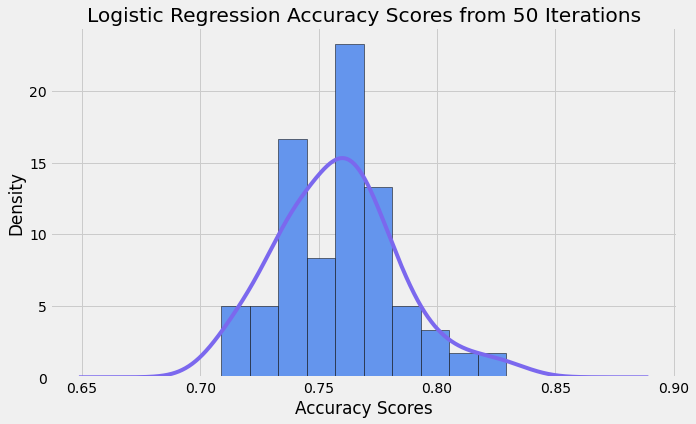

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))
plt.hist(logreg_acc, density = True, **kwargs_hist) # used the **kwargs trick to pass args
logreg_acc.plot(**kwargs_kde) # used the **kwargs trick to pass args
plt.title(f'Logistic Regression Accuracy Scores from {logreg_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

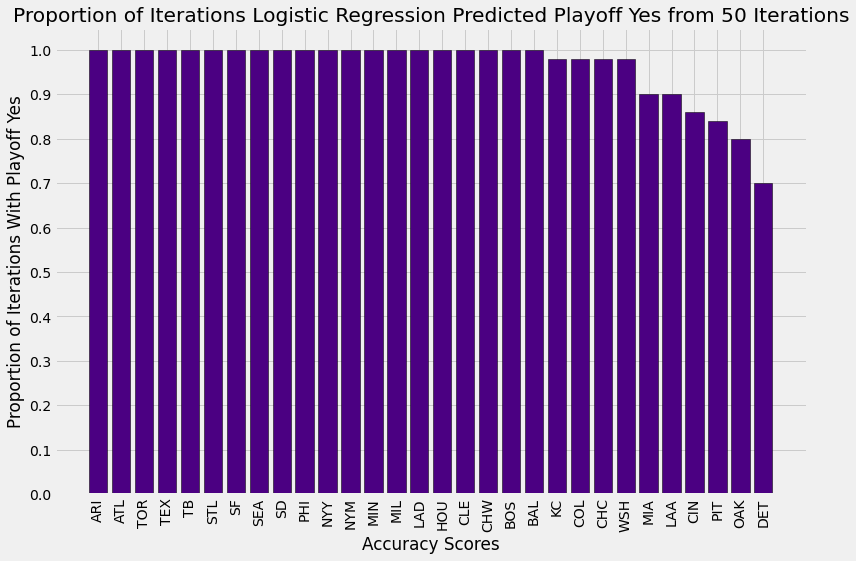

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
plt.bar(range(len(logreg_predictions)), logreg_predictions, **kwargs_bar)
plt.title(f'Proportion of Iterations Logistic Regression Predicted Playoff Yes from {logreg_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(logreg_predictions)), logreg_predictions.index.map(MLB_abr_map)
           , rotation = 90) # setting the x-labels as teams
plt.yticks(np.arange(0, 1.1, step = 0.1)) # adding more y-labels
plt.show()

## Random Forest Visualizations

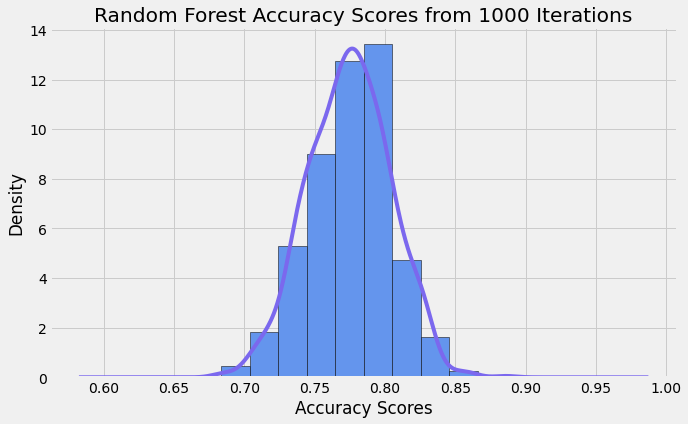

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))
plt.hist(rfc_acc, density = True, **kwargs_hist) # used the **kwargs trick to pass args
rfc_acc.plot(**kwargs_kde) # used the **kwargs trick to pass args
plt.title(f'Random Forest Accuracy Scores from {rfc_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

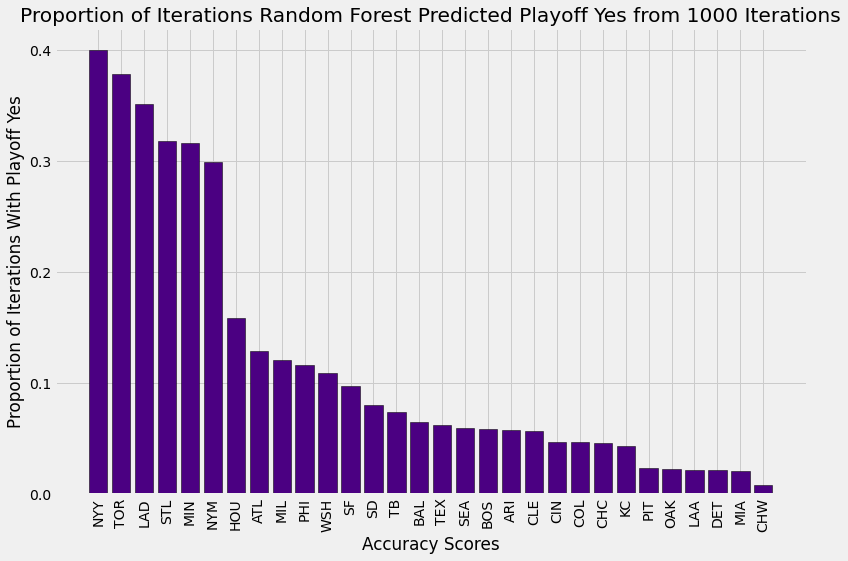

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
plt.bar(range(len(rfc_predictions)), rfc_predictions, **kwargs_bar)
plt.title(f'Proportion of Iterations Random Forest Predicted Playoff Yes from {rfc_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(rfc_predictions)), rfc_predictions.index.map(MLB_abr_map)
           , rotation = 90) # setting the x-labels as teams
plt.yticks(np.arange(0, max(rfc_predictions)+0.1, step = 0.1)) # adding more y-labels
plt.show()

## Decision Tree Visualizations

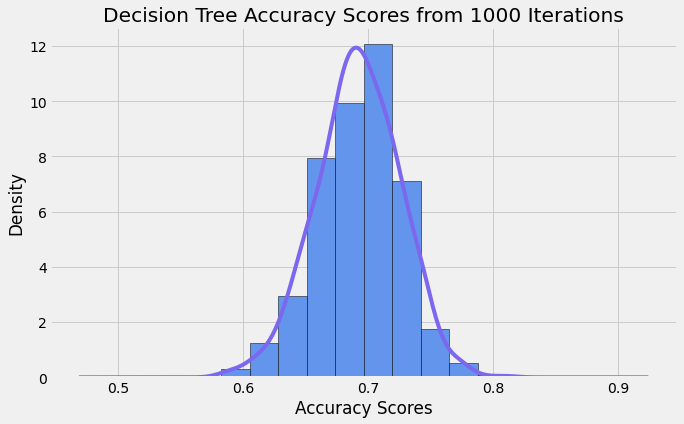

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 6))
plt.hist(dtc_acc, density = True, **kwargs_hist) # used the **kwargs trick to pass args
dtc_acc.plot(**kwargs_kde) # used the **kwargs trick to pass args
plt.title(f'Decision Tree Accuracy Scores from {dtc_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.show()

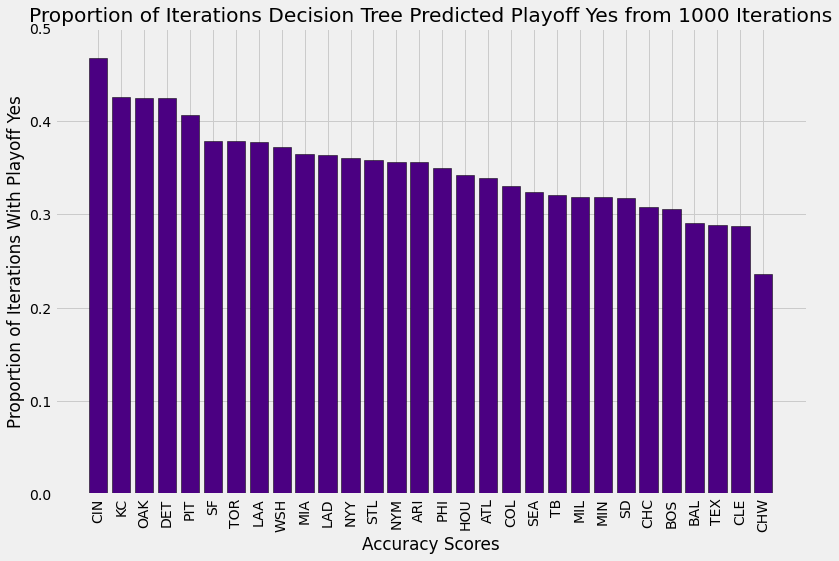

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
plt.bar(range(len(dtc_predictions)), dtc_predictions, **kwargs_bar)
plt.title(f'Proportion of Iterations Decision Tree Predicted Playoff Yes from {dtc_iterations} Iterations')
plt.xlabel('Accuracy Scores')
plt.ylabel('Proportion of Iterations With Playoff Yes')
plt.xticks(range(len(dtc_predictions)), dtc_predictions.index.map(MLB_abr_map)
           , rotation = 90) # setting the x-labels as teams
plt.yticks(np.arange(0, max(dtc_predictions)+0.1, step = 0.1)) # adding more y-labels
plt.show()